# Curve Fitting Part 2 - Practice

## Global Temperature Anomaly

Are you ready to use what you've learned so far?  Up to now, you have learned how to:

- write markdown to render text in a notebook.
- write Python code, with the numpy package for math functions, to calculate a quantity and print a result.
- read a file with data and plot the data on a graph.
- plot a mathematical function.
- fit a curve to data and find the best-fit parameters of the curve.

## Problem

To acertain long-scale changes in Earth's average temperature over time, scientists plot the **global surface temperature anomaly**. In this joint press release by NASA and NOAA on Jan. 18, 2018, [Long-Term Warming Trend Continued in 2017](https://www.giss.nasa.gov/research/news/20180118/), scientists "concluded that 2017 was the third-warmest year in their record." The [data and methodology](https://data.giss.nasa.gov/gistemp/) are provided to the public.

[According to NOAA](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php), "the term temperature anomaly means a departure from a reference value or long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value."

The reference for this anomaly data is the average temperature during the period 1951 - 1980. Sometimes the 20th century average global surface temperature is used. Then in this case, a positive anomaly is warmer than the 20th century average. A negative anomaly is cooler than the 20th century average. NOAA points out that the reference period does not "change the shape of the time series or affect the trends within it."

### Level C

(1) Read the file `global-surface-temperature.txt` and plot the global surface temperature anomaly as a function of year. Use a line graph (i.e. connect the data points).

A simple empirical model will certainly not fit the data, in terms of the annual ups and downs. However we can try different mathematical functions to see if they at least have similar behavior overall.

(2) Fit a linear function of the form

$$T = a_0 + a_1y$$

where $T$ is the global surface temperature anomaly and $y$ is the year. Print the best-fit parameters: $a_0$ and $a_1$, and plot the best fit curve with the data. You should appropriately title the graph, label the axes, and indicate what is plotted with a legend.

(3) Based on the linear function, how much is the global surface temperature anomaly increasing per year? Why is this called an *average* increase in temperature?


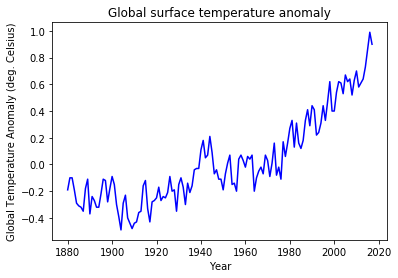

2. The best-fit parameters are a=298, b=-0.31.


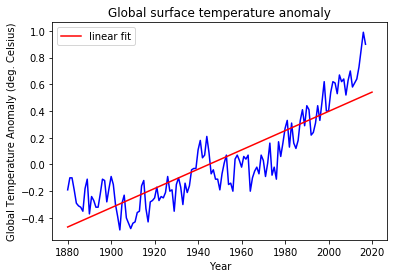

3. The slope of the best-fit line, 7.21e-03 degrees per year, is the average rate of increase in global surface temperature anomaly per year.

It is called an average increase because it assumes the same rate of change in temperature during the entire 140 year period.


In [41]:
### BEGIN SOLUTION
import numpy as np #used for numerical calculations with arrays
import matplotlib.pyplot as plt #used for plotting
import pandas as pd #used for data management
from scipy.optimize import curve_fit #used for curve fitting

df = pd.read_csv('global-surface-temperature.txt', sep='\t')
df.head()

Ydata = df['Year']
Tdata = df['Global Temperature Anomaly (deg C)']

fig = plt.figure()
plt.title('Global surface temperature anomaly')
plt.plot(Ydata, Tdata, 'b-')
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (deg. Celsius)')
plt.show()
### END SOLUTION

### BEGIN SOLUTION
def linear(xdata, a, b): 
    ydata = a + b*xdata #y = a + bx
    return ydata

parameters, stats = curve_fit(linear, Ydata, Tdata)

# parameters is a list of best-fit values for the parameters of the mathematical model we are using
# the first item [0] is the first constant
# the second item [1] is the second constant, etc.
a_bestlin=parameters[0] #a
b_bestlin=parameters[1] #b

print("2. The best-fit parameters are a={:.0f}, b={:.2f}.".format(a_best, b_best))

Yarray = np.linspace(1880, 2020, 1000)
Tarray = linear(Yarray, a_bestlin, b_bestlin)

fig = plt.figure()
plt.title('Global surface temperature anomaly')
plt.plot(Ydata, Tdata, 'b-')
plt.plot(Yarray, Tarray, 'r-', label='linear fit')
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (deg. Celsius)')
plt.legend()
plt.show()

print("3. The slope of the best-fit line, {:.2e} degrees per year, is the average rate of increase in global surface temperature anomaly per year.".format(b_bestlin))

print()

print("It is called an average increase because it assumes the same rate of change in temperature during the entire 140 year period.")

### END SOLUTION


### Level B

Using the same data set from `global-surface-temperature.txt`:

(1) Fit a quadratic function of the form

$$T = a_0 + a_1y + a_2y^2$$

Print the best-fit parameters and plot the data and best-fit curve on the same graph.

(2) Why is the quadratic function a better fit than the linear function?

(3) Why is it much more worrisome for the quadratic function to fit the data (compared to the linear function)?



1. The best-fit parameters for y=a + bx + cx^2 are a=2.98e+02, b=-3.13e-01, c=8.22e-05.


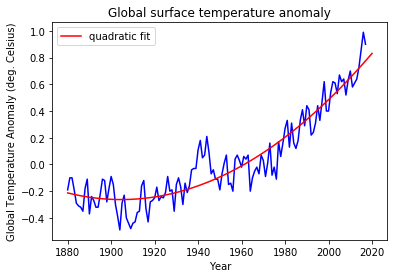

2. The quadratic fit is better because it shows that the data is non-linear. The rate of increase in the temperature is increasing.

3. This is much more worrisome because an increasing rate of temperature change means that global change is accelerating.


In [42]:
### BEGIN SOLUTION
def quadratic(xdata, a, b, c): 
    ydata = a + b*xdata + c*xdata**2 #y = a + bx + cx**2
    return ydata

parameters, stats = curve_fit(quadratic, Ydata, Tdata)

# parameters is a list of best-fit values for the parameters of the mathematical model we are using
# the first item [0] is the first constant
# the second item [1] is the second constant, etc.
a_best=parameters[0] #a
b_best=parameters[1] #b
c_best=parameters[2] #c

print("1. The best-fit parameters for y=a + bx + cx^2 are a={:.2e}, b={:.2e}, c={:.2e}.".format(a_best, b_best, c_best))

Yarray = np.linspace(1880, 2020, 1000)
Tarray = quadratic(Yarray, a_best, b_best, c_best)

fig = plt.figure()
plt.title('Global surface temperature anomaly')
plt.plot(Ydata, Tdata, 'b-')
plt.plot(Yarray, Tarray, 'r-', label='quadratic fit')
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (deg. Celsius)')
plt.legend()
plt.show()

print("2. The quadratic fit is better because it shows that the data is non-linear. The rate of increase in the temperature is increasing.")

print()

print("3. This is much more worrisome because an increasing rate of temperature change means that global change is accelerating.")
### END SOLUTION



### Level A

(1) What will be the temperature anomaly in year 2050? Answer this question two different ways:

   1. Use your best-fit function and substitute the year 2050.
   2. Create a list of years from 1880 to 2050, plot the best-fit function for this range of years, and examine the graph at year 2050.
   
(2) Suppose you are a politician and you are determining policy based on projections using this quadratic empirical model. Discuss the ethics, potentially both right and wrong, about basing policy on this emperical model.

(3) Use the linear model to predict the temperature anomaly in year 2050. Compare it to the quadratic model.

(4) In what way(s) is an emperical model limited?

(5) Is there any debate that *global warming* is occurring?

(6) Is it possible that some parts of Earth were actually cooler than the average? Check out [this map of temperature anomaly in 2017](https://data.giss.nasa.gov/gistemp/maps/).

1.1 In year 2050, the quadratic model predicts a temperature anomaly of 1.47 degrees Celsius.

1.2 We can see this on the graph below.


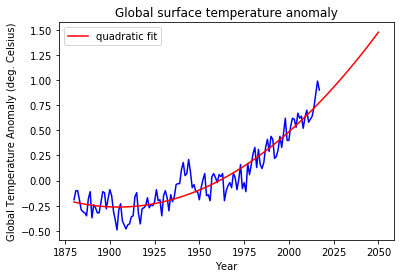

2. Emperical models have no theoretical basis. An emperical model is merely a mathematical function that fits the data. It cannot be used to predict the future because the system may change in fundamental ways in the future. Therefore, an empirical model should not be used to make predictions. However, one can state that if we don't change the underlying reasons for the increase in temperature, then we can be assured of higher temperatures in the future. The trend, if all else remains the same, is an increasing rate of global warming. Policy can be based on the outcome of what could happen, if nothing is done about it and if we understand the theoretical model.

3. In year 2050, the linear model predicts a temperature anomaly of 0.76 degrees Celsius. This is much less than the temperature predicted by the quadratic model.

4. An empirical model is limited because it has no theoretical basis. It's merely a trend in the data. Without understanding what causes the mathematical relationshi

In [43]:
### BEGIN SOLUTION
y = 2050
T = quadratic(y, a_best, b_best, c_best)
T

print("1.1 In year 2050, the quadratic model predicts a temperature anomaly of {:.2f} degrees Celsius.".format(T))

print()

print('1.2 We can see this on the graph below.')

Yarray = np.linspace(1880, 2050, 1000)
Tarray = quadratic(Yarray, a_best, b_best, c_best)

fig = plt.figure()
plt.title('Global surface temperature anomaly')
plt.plot(Ydata, Tdata, 'b-')
plt.plot(Yarray, Tarray, 'r-', label='quadratic fit')
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (deg. Celsius)')
plt.legend()
plt.show()

print("2. Emperical models have no theoretical basis. An emperical model is merely a mathematical function that fits the data. It cannot be used to predict the future because the system may change in fundamental ways in the future. Therefore, an empirical model should not be used to make predictions. However, one can state that if we don't change the underlying reasons for the increase in temperature, then we can be assured of higher temperatures in the future. The trend, if all else remains the same, is an increasing rate of global warming. Policy can be based on the outcome of what could happen, if nothing is done about it and if we understand the theoretical model.")


Tlin = linear(y, a_bestlin, b_bestlin)

print()
print("3. In year 2050, the linear model predicts a temperature anomaly of {:.2f} degrees Celsius. This is much less than the temperature predicted by the quadratic model.".format(Tlin))

print()
print("4. An empirical model is limited because it has no theoretical basis. It's merely a trend in the data. Without understanding what causes the mathematical relationship in the data, we cannot predict the future.")

print()
print("5. There is no debate that global warming is ocurring. There is also little debate that it is caused by humans. The biggest debate is whether Earth can adapt fast enough and whether we can or should limit carbon dioxide emissions worldwide.")

print()
print("6. Yes, global surface temperature anomaly is an average. Some areas of Earth are warmer and some areas are cooler. More are warmer.")
### END SOLUTION